# Introduction
In Part II, we performed simple exploratory data analysis to investigate patterns in the data. 

If you have noticed, our columns contain nothing but strings. We will need to prepare the data that is suitable for training, by dummifying the string values.

### What is dummification?
For one-hot encoding/dummification of the categorical values, there are various ways to do it. 

However, no matter which method you do it, make sure you drop one column to avoid the <strong>dummy variable trap</strong>.

For example, if your column contains four categorical values, you'd have to drop one of the four columns after one-hot encoding.

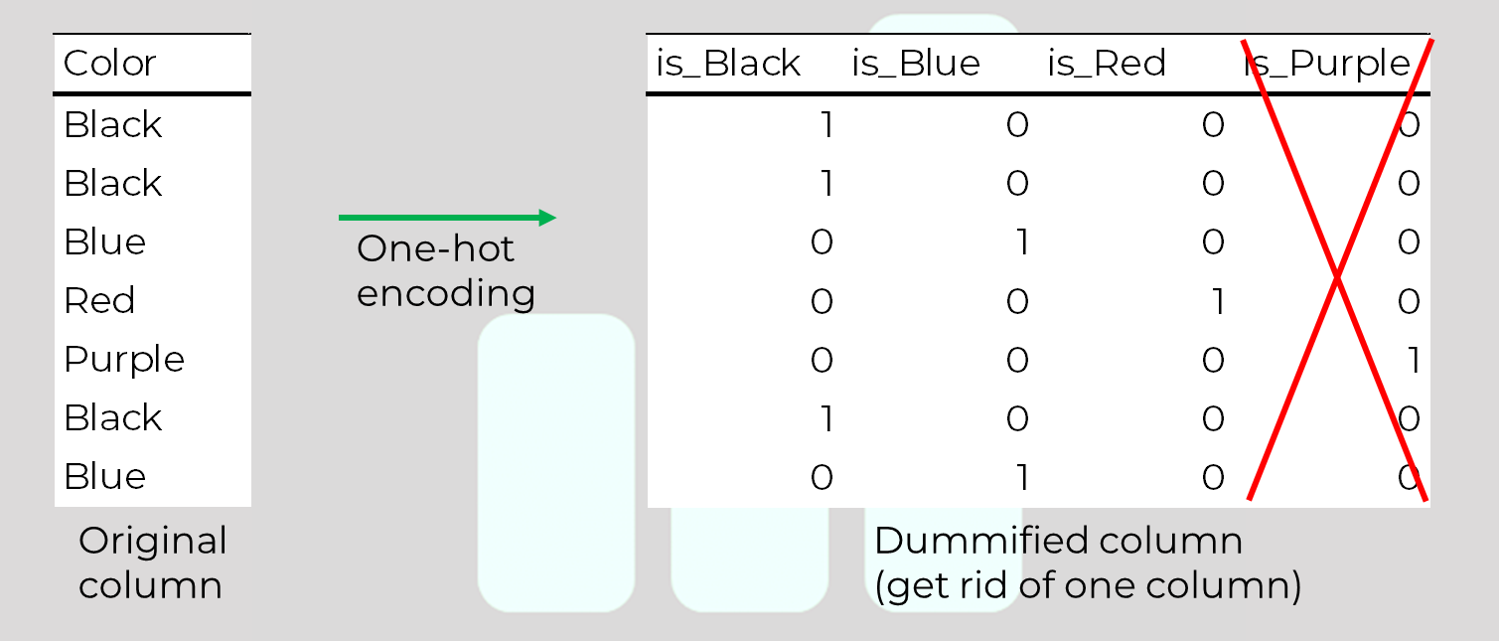

In this example, we drop is_Purple because is_Purple is redundant, i.e. you can infer that row's values based on is_Black, is_Blue, and is_Red. If all of those values are 0, it means the row contains purple instead.

Suggested reading: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

### Step 1: Import pandas
Let's start with importing pandas to read our CSV from Part I.

In [1]:
# Step 1: Import pandas as pd
import pandas as pd

### Step 2: Read the CSV from Part I as DataFrame
We will now read the data that we exported from Part I.

In [2]:
# Step 2: Read your file from Part I
df = pd.read_csv('agaricus-lepiota.data')
df.pop('Unnamed: 0')
df

,class,cap_shape,cap_surface,cap_color,isBruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Step 3: Turn 'class' values into binary values
Before we do anything, let's turn the values in 'class' column into binary form. 

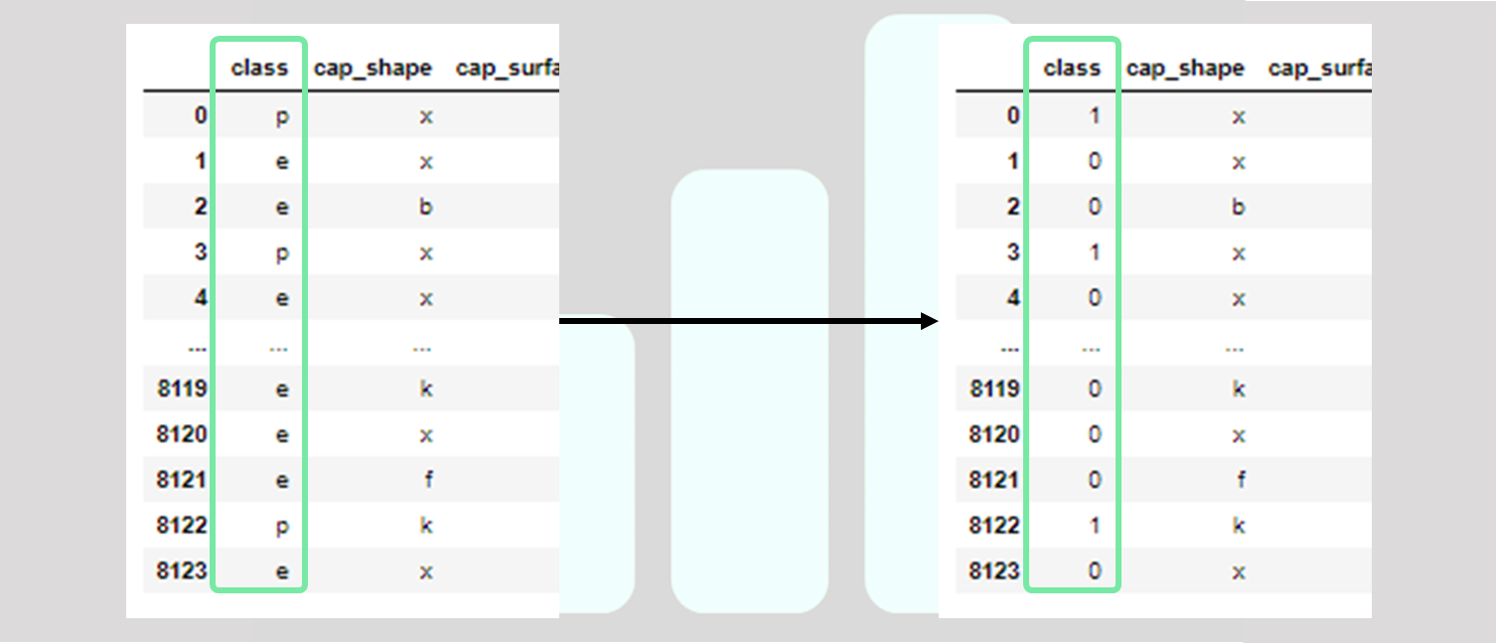

Here's what we need to change first:
1. p -> 1
2. e -> 0

There are many ways to do this, and here are some recommendations:
1. using a for loop to loop through 'class', and using if/else to append the binaries into a list to replace 'class'
2. LabelEncoder from sklearn.preprocessing
3. pd.get_dummies(), and using the results to replace 'class'

<strong>Hint: Google "how to apply LabelEncoder for a specific column in pandas dataframe"</strong>

In [9]:
# Step 4: Turn the values in 'class' into binaries
# df['class']
# for x in df['class']:
#     print(x)
# #     if x == 'p':
# #         df.loc[df['class'] == 'p', 'class'] = 1
# #     if x == 'e':
# #         df.loc[df['class'] == 'e', 'class'] = 0

df['class'] = df['class'].replace('p', 1)
df['class'] = df['class'].replace('e', 0)
df['class']
df

,class,cap_shape,cap_surface,cap_color,isBruised,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
# Use this step if you're really stuck
# Step 4a: import LabelEncoder from sklearn.preprocessing

# Step 4b: Declare a variable containing LabelEncoder()

# Step 4c: Fit transform your 'class' values into the LabelEncoder() and store the results in a new variable

# Step 4d: Replace the 'class' column with the variable from Step 4c

### Step 5: Dummify the rest of the DataFrame
Now that you're done transforming the 'class' column, it's time to transform the rest of the columns.

We will be using pandas get_dummies method to one-hot encode the columns, along with dropping the first column. This results in this:

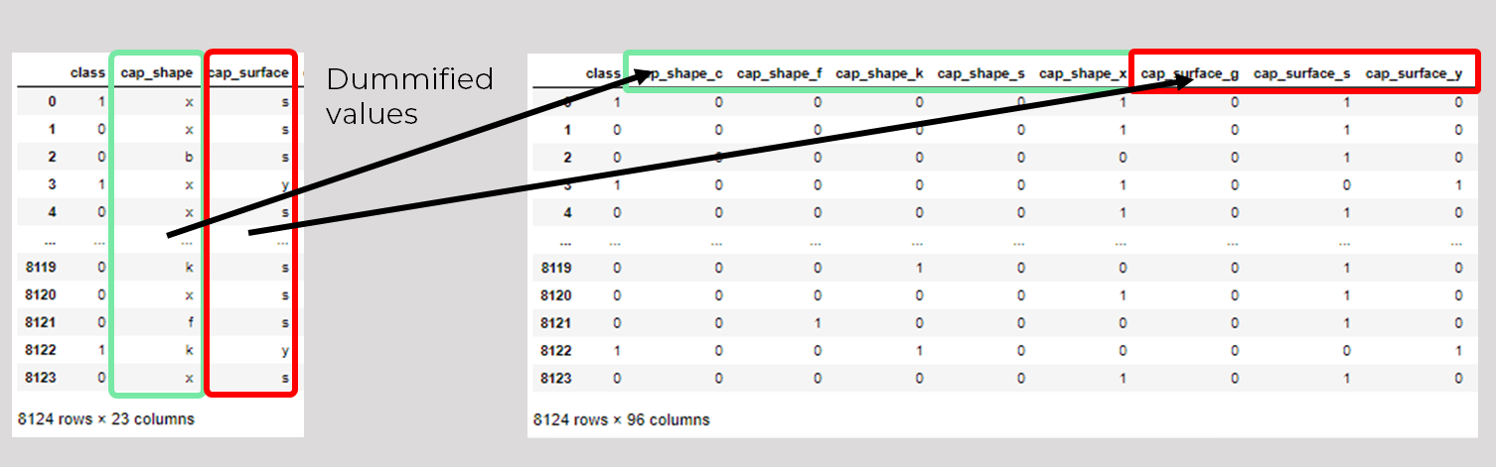

Don't worry about 'class' column - nothing will happen to that column since it's already in binary form so you can dummify the entire DataFrame.

At the end, you will have a DataFrame that is:
1. 8,124 rows
2. 96 columns

<strong>Hint: Don't forget to drop_first = True</strong>

In [14]:
# Step 5: Dummify your DataFrame
df = pd.get_dummies(df, drop_first=True)
df

,class,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


### Step 6: Export dummy DataFrame 
Now that you've dummified all of your columns, you can finally export the DataFrame into a CSV.

In [16]:
# Step 6: Export DataFrame into a CSV
df.to_csv('agaricus-lepiota.data')
df

,class,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


### End of Part III
It was a short part, but a really crucial one. In Part III, you successfully prepared your data for machine learning modelling.

In Part IV, you will see you effort pay off as you train the ultimate mushroom classifier model. 